# K-means clustering {-}

This repository aims at familiarizing with training and testing K-means clustering model.

- Load the data.
- Analyze the data.
- Use Elbow method to determine the number of clusters K.
- Train a K-means clustering model.
- Perform cluster visualization in two ways:
  - Apply PCA to perform dimensionality reduction: project data features into a three-dimensional space and two-dimensional space and visualize the clusters.
  - Visualize the clusters using T-distributed Stochastic Neighbor Embedding (T-SNE). T-SNE is a tool for visualizing high-dimensional data. T-SNE, based on stochastic neighbor embedding, is a nonlinear dimensionality reduction technique to visualize data in a two or three dimensional space. Refernece: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- Take some samples from each cluster and analyze their features to see the clusters' characteristics.


The dataset will be working on is 'credit-card-holder-data.csv'. It is composed of attributes such as balance of the credit card, ammount of purchase, etc., to develop a customer segmentation model.

**1. Load the data**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset in pandas dataframe
df = pd.read_csv("credit-card-holder-data.csv")

In [ ]:
# Show several
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

**2. Analyze the data**

In [ ]:
# Drop "Unnamed:0" column as it does not contain useful information
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
# Show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
# Descibe the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


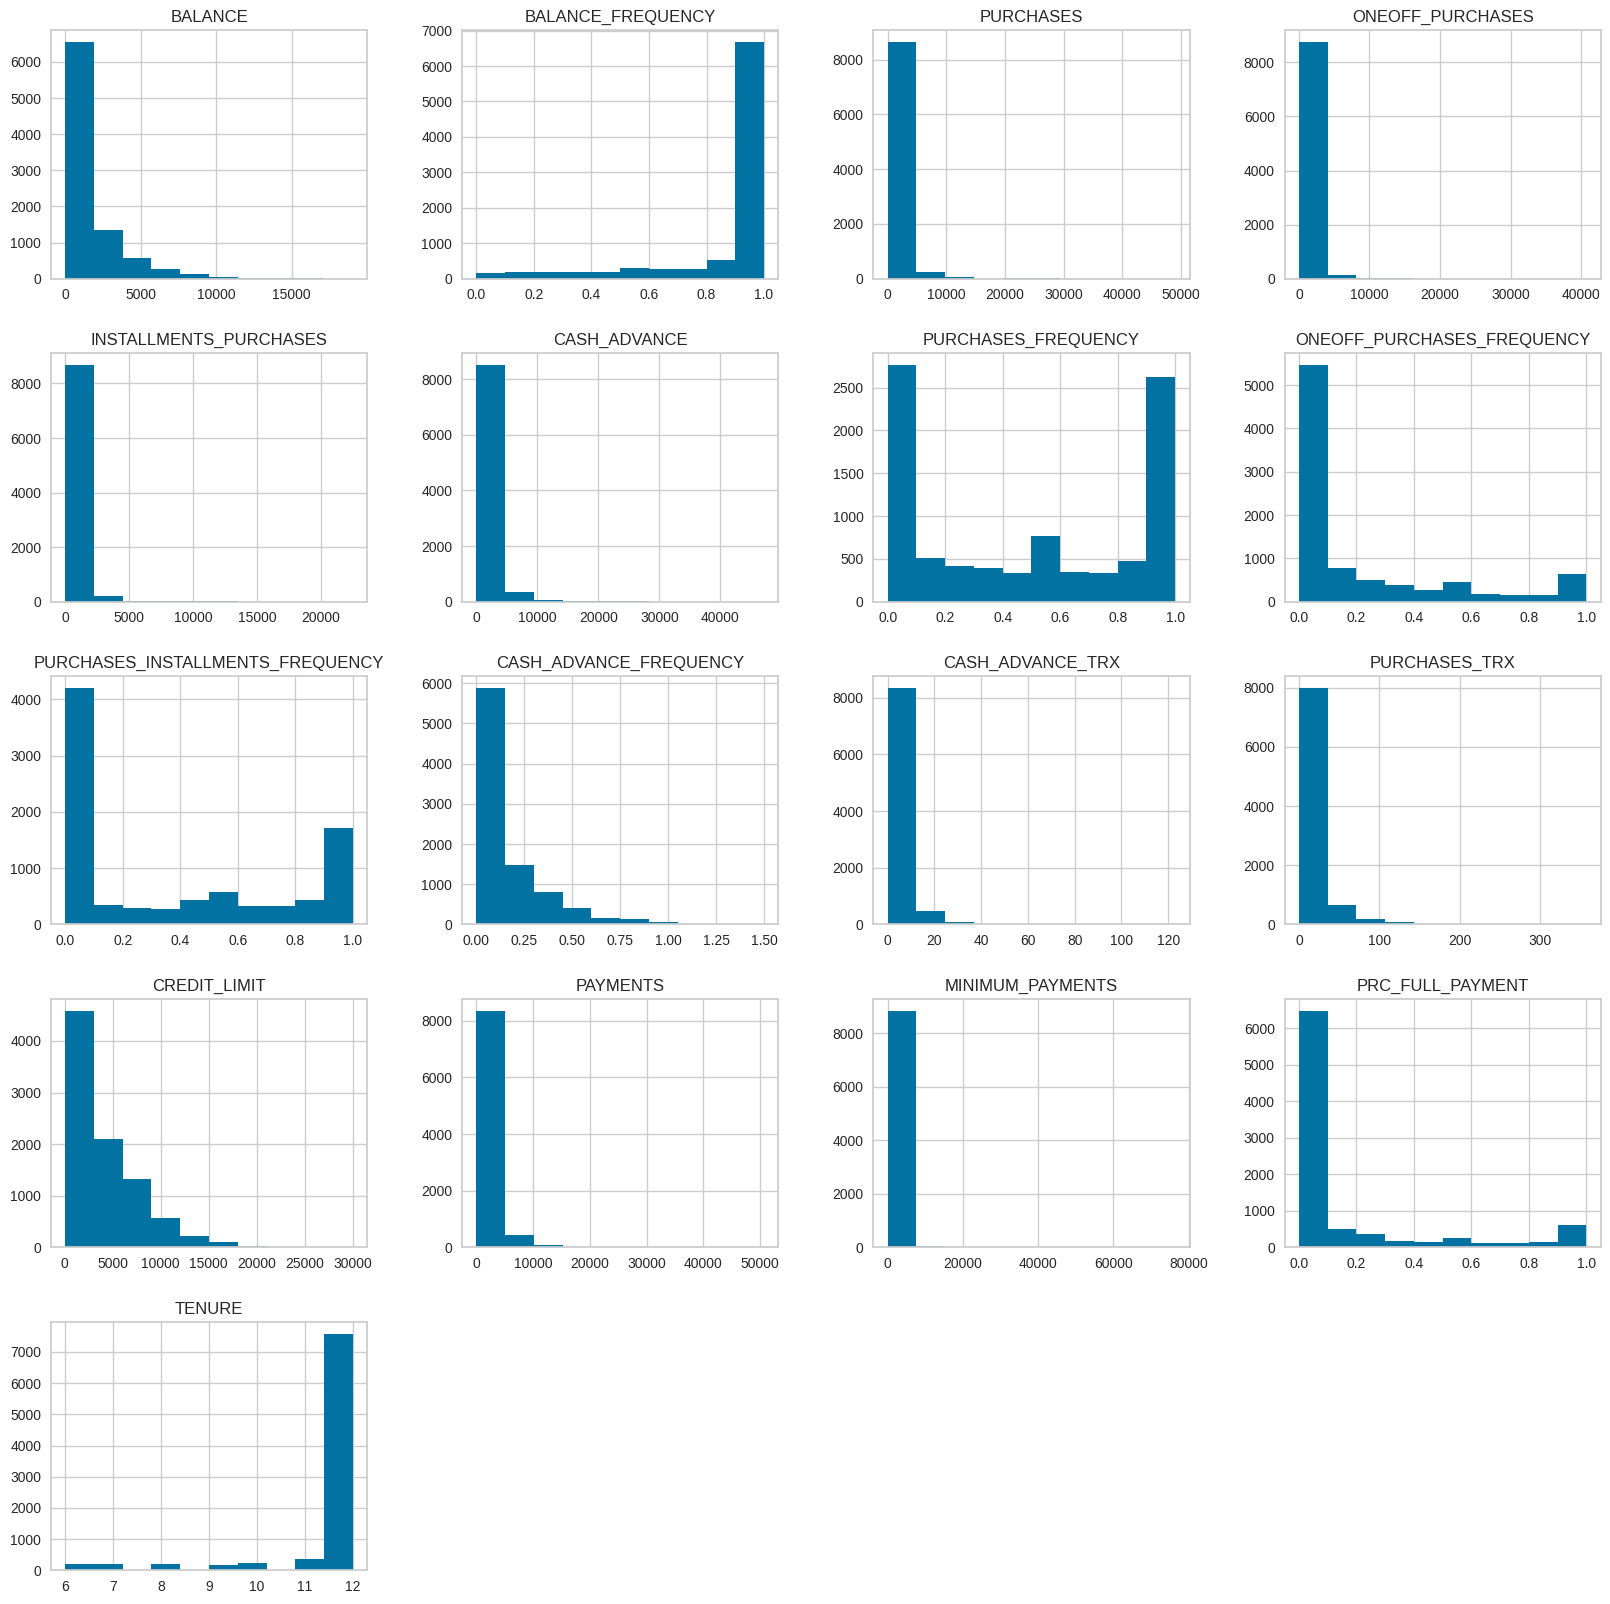

In [ ]:
# Plot histograms of all data features
df.hist(figsize=(20, 20))
plt.show()

<Axes: >

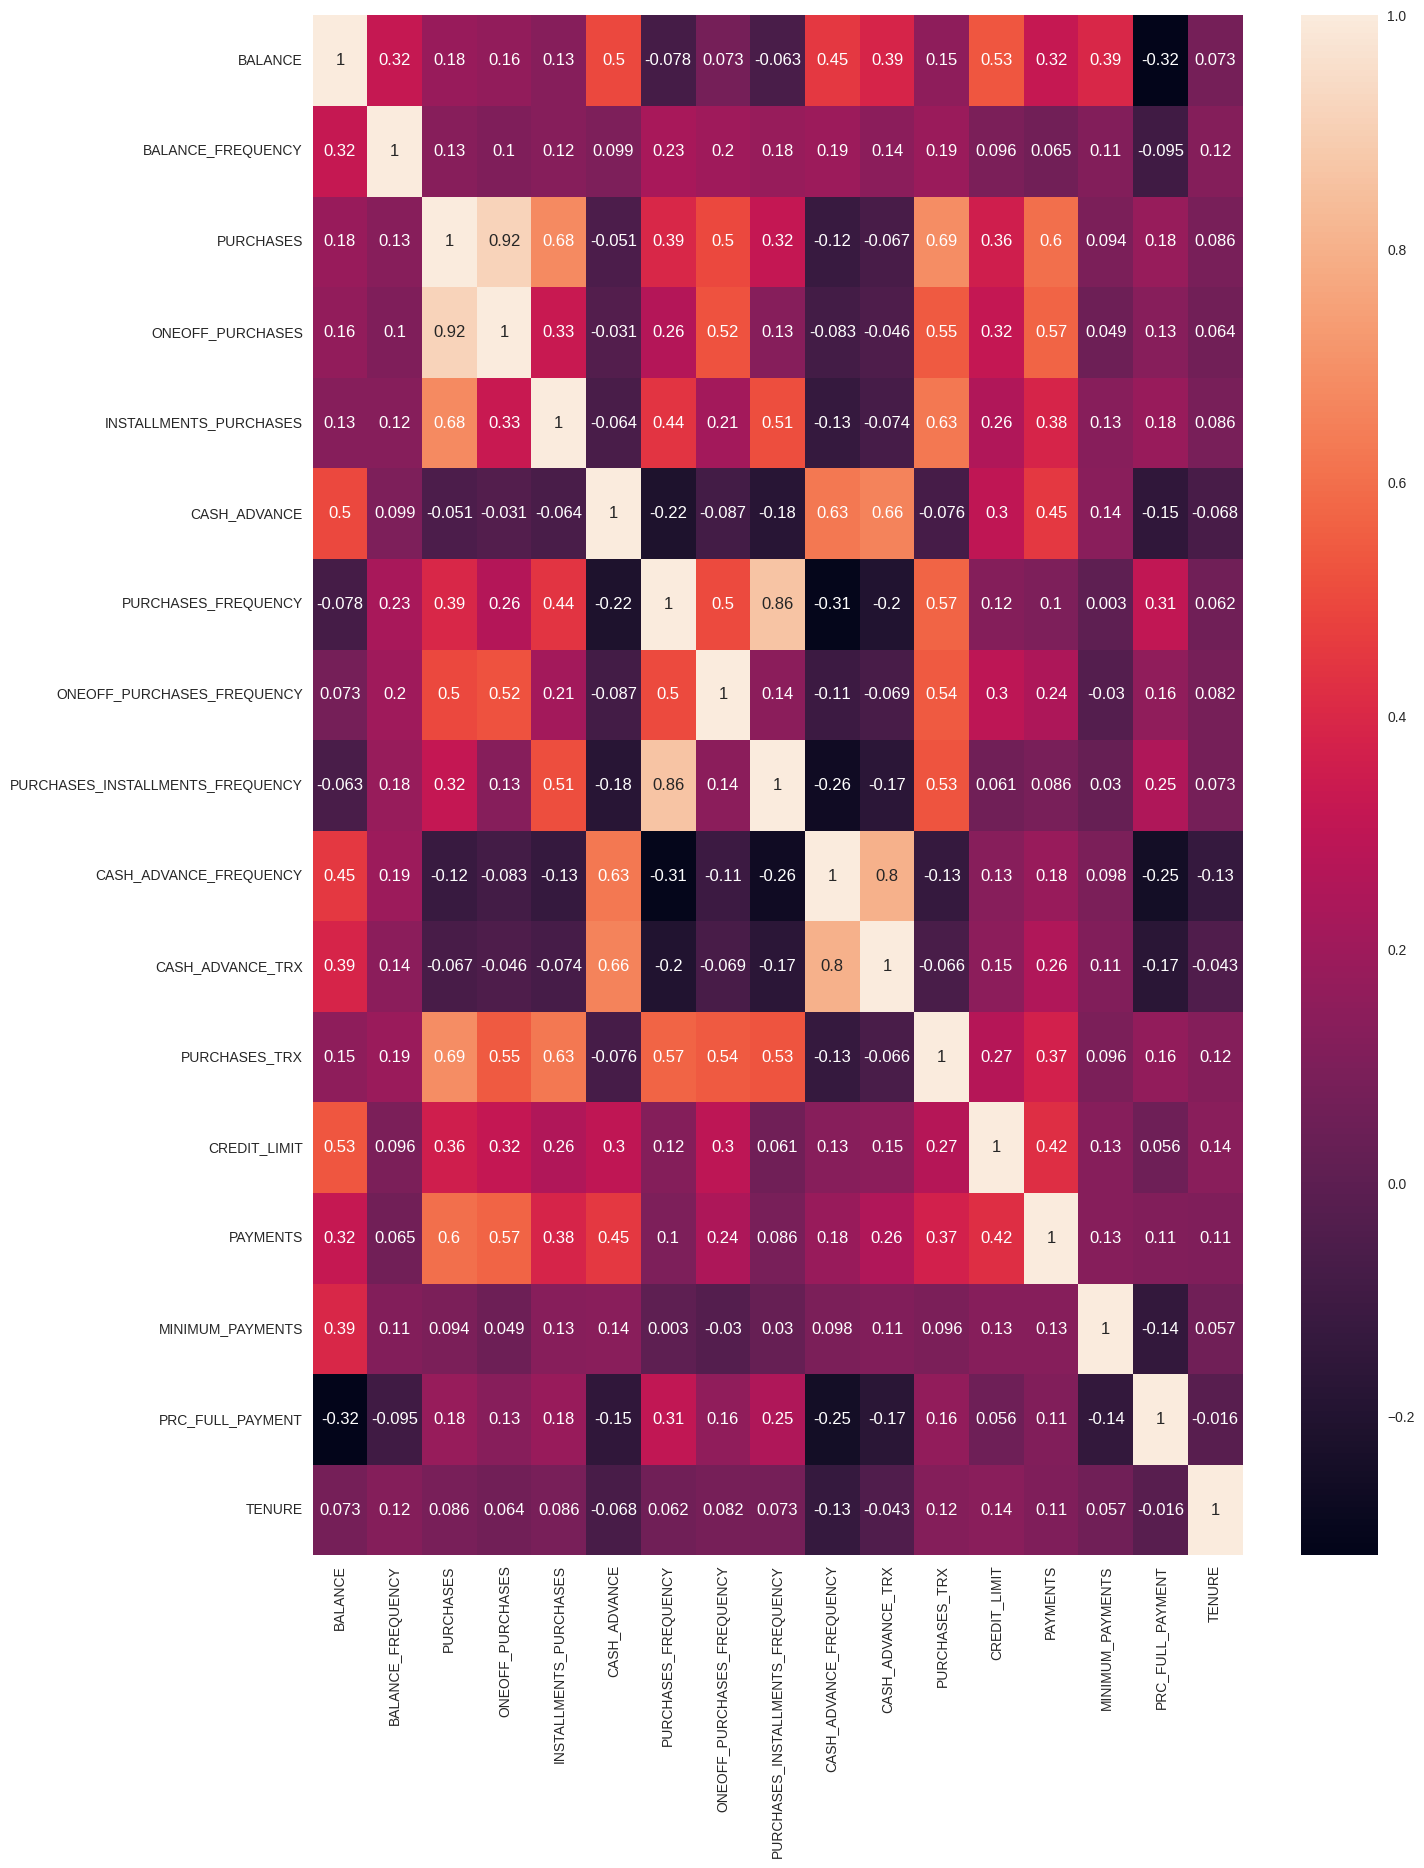

In [ ]:
# Polt the correlation heatmap between pairs of features.
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

**3. Compute the number of cluster K**

In [ ]:
# Standardize the data features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

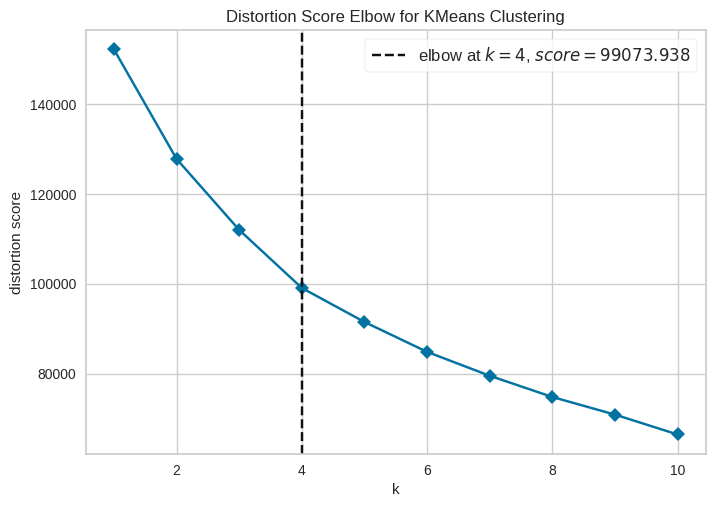

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Install yellowbrick library
# !pip install yellowbrick

# Import KElbowVisualizer to use Elbow method
from yellowbrick.cluster import KElbowVisualizer

# Import KMeans library to use Kmeans algorithm
from sklearn.cluster import KMeans

# Compute the number of cluster K
elbow_method = KElbowVisualizer(KMeans(), k=(1,11), timings=False, locate_elbow=True)
elbow_method.fit(scaled_data)
elbow_method.show()

# The optimal value of K is 4

**4. Train K-means clustering model**

In [ ]:
# Let us pick four clusters since the optimal value of K is 4
kmeans_model = KMeans(n_clusters=4)

# Run K-means algorithm with K=4
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# Show cluster label of training data samples
kmeans_model.labels_

array([0, 2, 3, ..., 3, 0, 0], dtype=int32)

In [ ]:
# Make cluster label prediction of new data samples (assume here we use scaled_data as tes data samples).
kmeans_model.predict(scaled_data)

array([0, 2, 3, ..., 3, 0, 0], dtype=int32)

In [ ]:
# Show location of cluster centroids
kmeans_model.cluster_centers_

array([[-2.65551629e-01, -3.68944296e-01, -3.43190301e-01,
        -2.30500433e-01, -3.87798111e-01, -1.82691101e-01,
        -7.97822605e-01, -3.89436941e-01, -7.14245761e-01,
        -1.01500402e-01, -1.64607283e-01, -4.74987456e-01,
        -3.34417115e-01, -2.62060256e-01, -1.19249231e-01,
        -2.58865702e-01, -5.29718263e-02],
       [ 9.54484507e-01,  4.62693629e-01,  3.12584465e+00,
         2.71325131e+00,  2.40646962e+00, -1.55090594e-01,
         1.13633760e+00,  1.79865349e+00,  1.06591778e+00,
        -3.19095705e-01, -1.70458235e-01,  3.00325068e+00,
         1.42988161e+00,  1.91909626e+00,  4.77420629e-01,
         4.54702830e-01,  3.24139633e-01],
       [ 1.45957775e+00,  3.84753065e-01, -2.34638427e-01,
        -1.63914013e-01, -2.53746975e-01,  1.68897201e+00,
        -5.04847568e-01, -2.12939102e-01, -4.50201244e-01,
         1.74594805e+00,  1.61714316e+00, -2.83579688e-01,
         8.38967661e-01,  6.03820830e-01,  4.90909814e-01,
        -4.06367280e-01, -9.7

**5. Perform cluster visualization applying CPA**

In [ ]:
# Import PCA library
from sklearn.decomposition import PCA

# Find all principal components of the data, and equal to the number of data features.
pca = PCA(n_components=len(df.columns))
pca.fit(scaled_data)

PCA(n_components=17)

In [ ]:
# Print the amount of variance carried in each principal components (eigenvalues). This is the eigen values.
print("Amount of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_))

# Print the ratio of ammount of variance carried in each principal components (eigen values). The ratio is calculated by dividing the eigenvalue of each component by the sum of eigenvalues
print("\nRatio of variance carried in each principal components (eigen values) :\n" + str(pca.explained_variance_ratio_))

# Sum of all ratios must be 1
print("\nCummulative sum of all ratios :\n" + str(pca.explained_variance_ratio_.cumsum()))

Amount of variance carried in each principal components (eigen values) :
[4.63982474e+00 3.45172419e+00 1.49480352e+00 1.27173785e+00
 1.06479362e+00 9.77645154e-01 8.30922729e-01 7.23853420e-01
 6.50969490e-01 5.23659568e-01 4.03267614e-01 3.01551195e-01
 2.42530713e-01 2.06975882e-01 1.72227523e-01 4.54007901e-02
 1.16501010e-05]

Ratio of variance carried in each principal components (eigen values) :
[2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]

Cummulative sum of all ratios :
[0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


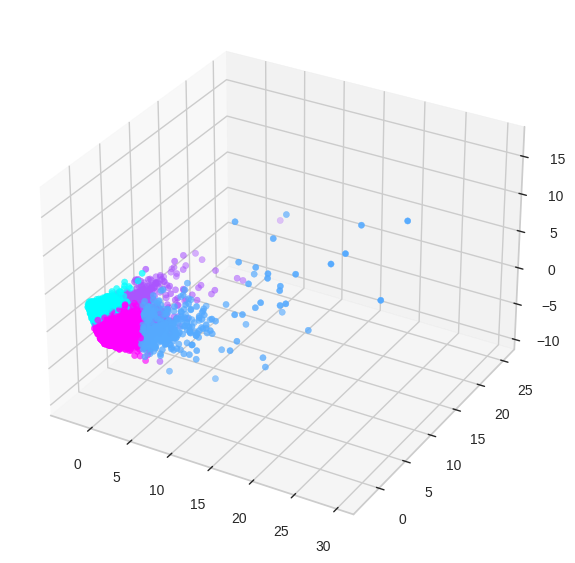

In [ ]:
# 3-dimensional CPA

# We test the three most important principal components as they cover 56.4% (0.564) of the data variance.
pca3 = PCA(n_components=3)

# Fit and transform into the 3-dimensional PCA space
pca3_data = pca3.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 3-dimensional PCA space, namely "pca_1", "pca_2" and "pca_3"
pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])

# Plot the data points in the 3-dimensional space with feature pca_1, pca_2 and pca_3, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca3_df.pca_1, pca3_df.pca_2, pca3_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

<ipython-input-219-2972554aec1b>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label


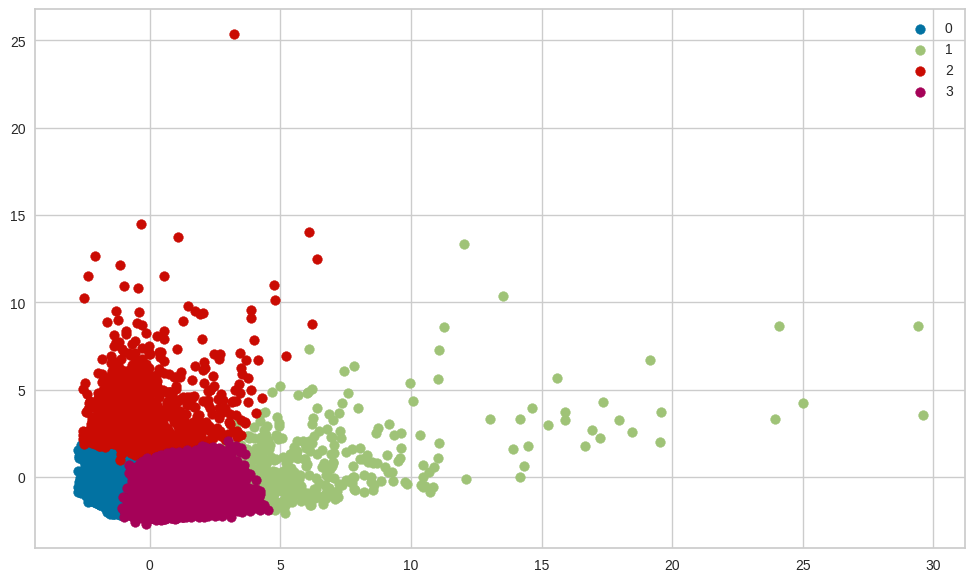

In [ ]:
# 2-dimensional CPA

# We test the two most important principal components as they cover 47.6% (0.476) of the data variance.
pca2 = PCA(n_components=2)

# Fit and transform into the 2-dimensional PCA space
pca2_data = pca2.fit_transform(scaled_data)

# Create a dataframe from the projected data points in 2-dimensional PCA space, namely "pca_1" and "pca_2"
pca2_df = pd.DataFrame(pca2_data, columns=["pca_1", "pca_2"])

# Plot the data points in the 2-dimensional space with feature pca_1 and pca_2, using the class information in kmeans_model.labels_
plt.figure(figsize=(12, 7))
ax = plt.subplot()
group = kmeans_model.labels_    # List of labels
# Plot data samples in each label group: 0, 1 and 2.
for g in np.unique(group):
    index = np.where(group==g)     # Get all indices of label group g
    ax.scatter(pca2_df.iloc[index].pca_1, pca2_df.iloc[index].pca_2, label=g, cmap="cool")     # Plot data points with label
ax.legend()
plt.show()

**6. Perform cluster visualization applying T-SNE**

In [ ]:
# Import TSNE library
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features = tsne.fit_transform(scaled_data) # Project data (high dimension) to TSNE space (low dimension)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.002s...
[t-SNE] Computed neighbors for 8950 samples in 0.640s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.427264
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.945908
[t-SNE] KL divergence after 1000 iterations: 1.500975


[Text(0.5, 1.0, 'Cluster visualization on a 2-dimensional space')]

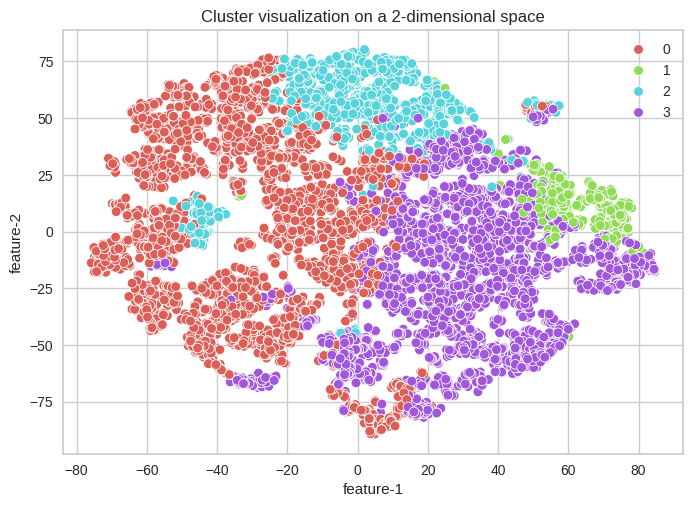

In [ ]:
# Create a data frame with TSNE features and data label
data = df.copy()
data["label"] = kmeans_model.labels_
data["feature-1"] = tsne_features[:,0]
data["feature-2"] = tsne_features[:,1]

# Visualize the clusters
sns.scatterplot(x="feature-1", y="feature-2", # Set the two TSNE features to the axes
                hue=data.label.tolist(), # Set the label
                palette=sns.color_palette("hls", 4), # Set cluster colors
                data=data).set(title="Cluster visualization on a 2-dimensional space") # Set dataframe to visulize and plot title

**7. Take some samples from each cluster and analyze their features to see the clusters' characteristics.**

In [ ]:
# Load and save the model

# Save model using pickle library
import pickle
file_name = "model.sav"                              # Path to save the model
pickle.dump(kmeans_model, open(file_name, "wb"))     # Save the model to a pickle file

# Load the saved model using pickle library
file_name = "model.sav"
load_model = pickle.load(open(file_name, "rb"))

# Access cluster information from the loaded model
cluster = load_model.labels_
cluster_0 = np.where(cluster==0)   # indices of data samples in cluster 0
cluster_1 = np.where(cluster==1)   # indices of data samples in cluster 1
cluster_2 = np.where(cluster==2)   # indices of data samples in cluster 2
cluster_3 = np.where(cluster==3)   # indices of data samples in cluster 3


In [ ]:
# Get data samples in cluster 0
cluster_sample_0 = df.iloc[cluster_0]

# Describe cluster 0
cluster_sample_0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000
mean,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
std,1097.368627,0.295184,467.629965,448.020861,155.198248,918.845971,0.188211,0.135703,0.148779,0.136996,2.963950,3.935739,2654.908975,1578.553518,1314.377150,0.205789,1.416399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,82.249034,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,268.254041,160.857255,0.000000,12.000000
50%,763.684601,1.000000,79.100000,0.000000,0.000000,116.886449,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,534.729290,310.336181,0.000000,12.000000
75%,1505.001170,1.000000,339.767500,211.877500,51.207500,934.970675,0.333333,0.100000,0.083333,0.166667,3.000000,5.000000,4000.000000,1072.484778,657.149667,0.000000,12.000000
max,8115.039014,1.000000,4900.000000,4900.000000,3000.000000,6523.780195,1.000000,1.000000,0.857143,0.857143,23.000000,43.000000,23000.000000,29272.486070,28483.254830,1.000000,12.000000


In [ ]:
# Get data samples in cluster 1
cluster_sample_1 = df.iloc[cluster_1]

# Describe cluster 1
cluster_sample_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
std,3344.579386,0.059070,5978.185287,5377.597586,2727.924691,1872.977038,0.134578,0.289475,0.313123,0.153532,6.084375,56.419780,4824.345602,6875.811470,5069.201346,0.392138,0.451093
min,137.636267,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,0.000000,108.937025,0.000000,6.000000
25%,881.358988,1.000000,4569.650000,2265.110000,835.800000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,52.000000,6000.000000,3597.677582,249.009390,0.000000,12.000000
50%,2492.726282,1.000000,5848.550000,3705.130000,1827.960000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,79.000000,9000.000000,5446.940305,726.696049,0.000000,12.000000
75%,5193.415429,1.000000,8533.540000,6206.990000,3176.000000,283.476295,1.000000,1.000000,1.000000,0.083333,1.000000,110.000000,12000.000000,8337.882098,1912.298544,0.666667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Get data samples in cluster 2
cluster_sample_2 = df.iloc[cluster_2]

# Describe cluster 2
cluster_sample_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
std,2754.575494,0.091212,862.938799,666.283102,416.133434,3622.443388,0.354104,0.228871,0.311182,0.228421,12.299926,14.043625,3744.186712,4210.279433,3888.093906,0.103212,1.471048
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000
25%,2480.135387,1.000000,0.000000,0.000000,0.000000,2321.162031,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1214.469989,752.614680,0.000000,12.000000
50%,4275.708869,1.000000,85.730000,0.000000,0.000000,3653.331329,0.083333,0.000000,0.000000,0.500000,11.500000,1.000000,7000.000000,1963.135909,1309.935203,0.000000,12.000000
75%,6239.276755,1.000000,654.852500,330.352500,144.625000,5592.000447,0.571429,0.166667,0.333333,0.666667,17.000000,10.000000,10000.000000,4021.265959,2043.939591,0.000000,12.000000
max,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000


In [ ]:
# Get data samples in cluster 3
cluster_sample_3 = df.iloc[cluster_3]

# Describe cluster 3
cluster_sample_3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000
mean,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
std,1212.134419,0.161833,1041.149669,872.592208,623.932335,602.337305,0.150874,0.353245,0.313701,0.099497,2.029238,15.954692,3261.269960,1275.813034,1776.698287,0.357381,1.248127
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000
25%,80.529535,1.000000,439.960000,0.000000,223.255000,0.000000,0.800000,0.000000,0.545455,0.000000,0.000000,12.000000,1500.000000,456.587019,161.279143,0.000000,12.000000
50%,337.269567,1.000000,892.300000,168.540000,450.670000,0.000000,1.000000,0.111111,0.833333,0.000000,0.000000,16.000000,3000.000000,938.788924,196.720403,0.083333,12.000000
75%,1256.639648,1.000000,1772.165000,903.000000,874.375000,0.000000,1.000000,0.583333,1.000000,0.000000,0.000000,28.000000,6000.000000,1778.813262,606.819688,0.500000,12.000000
max,9502.256762,1.000000,6520.000000,6520.000000,4538.840000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000
